<a href="https://colab.research.google.com/github/LuisVFCO/EntregaFinalBD/blob/main/Tuberculose2022BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega Final - Big Data

Descrição da Atividade:

Requisitos básicos:

1. Carregar o conjunto de dados.
2. Realizar a limpeza, processamento e análise dos dados usando PySpark.
3. Elaborar um relatório com os principais insights gerados pelo trabalho do grupo.

- Integrantes do grupo:

  - Adonis Vinicius,
  - Alan Vitor,
  - Cicero Antônio,
  - Esmeralda Freire,
  - João Victor Santos,
  - Luis Vinicius.

- Link para dicionário de dados: https://github.com/LuisVFCO/DicionarioBD.git
- Link para a entrega anterior(semelhante, feito apenas em Jupyter): https://github.com/LuisVFCO/Entrega2BIGDATA.git

 Introdução:

 - Instalando o Pysus:

    - O que é o Pysus?
        - O PySUS é uma biblioteca em Python desenvolvida para facilitar o acesso e a análise de dados do Sistema Único de Saúde (SUS) do Brasil ou seja, permite o download de diversas bases de dados públicas do DATASUS.

In [1]:
pip install pysus

   - Importando SINAN:

    - O que é o SINAN?
      - O Sistema de Informação de Agravos de Notificação (SINAN), é uma das principais fontes de dados de vigilância epidemiológica no Brasil. Ele registra notificações de doenças e agravos de interesse para a saúde pública, fornecendo informações cruciais para o monitoramento, prevenção e controle de doenças no país.

In [2]:
from pysus.online_data import SINAN

- Importando bibliotecas que podem ser usadas:
  - pandas;
  - matplotlib;
  - numpy;
  - seaborn.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
!pip install matplotlib

- Listando bases de dados de doenças disponíveis no SINAN:

In [7]:
SINAN.list_diseases()

{'ACBI': 'Acidente de trabalho com material biológico',
 'ACGR': 'Acidente de trabalho',
 'ANIM': 'Acidente por Animais Peçonhentos',
 'ANTR': 'Atendimento Antirrabico',
 'BOTU': 'Botulismo',
 'CANC': 'Cancêr relacionado ao trabalho',
 'CHAG': 'Doença de Chagas Aguda',
 'CHIK': 'Febre de Chikungunya',
 'COLE': 'Cólera',
 'COQU': 'Coqueluche',
 'DENG': 'Dengue',
 'DERM': 'Dermatoses ocupacionais',
 'DIFT': 'Difteria',
 'ESQU': 'Esquistossomose',
 'EXAN': 'Doença exantemáticas',
 'FMAC': 'Febre Maculosa',
 'FTIF': 'Febre Tifóide',
 'HANS': 'Hanseníase',
 'HANT': 'Hantavirose',
 'HEPA': 'Hepatites Virais',
 'IEXO': 'Intoxicação Exógena',
 'INFL': 'Influenza Pandêmica',
 'LEIV': 'Leishmaniose Visceral',
 'LEPT': 'Leptospirose',
 'LERD': 'LER/Dort',
 'LTAN': 'Leishmaniose Tegumentar Americana',
 'MALA': 'Malária',
 'MENI': 'Meningite',
 'MENT': 'Transtornos mentais relacionados ao trabalho',
 'NTRA': 'Notificação de Tracoma',
 'PAIR': 'Perda auditiva por ruído relacionado ao trabalho',
 'PE

   - Doença escolhida: Tuberculose, no ano de 2022.

    - Baixando a base de dados sobre tuberculose no ano de 2022:

In [8]:
SINAN.download('TUBE', years=2022)

TUBEBR22.parquet: 100%|██████████| 187k/187k [00:18<00:00, 9.89kB/s]


/root/pysus/TUBEBR22.parquet

   - Carregando a base de dados sobre tuberculose no ano de 2022:.

In [9]:
df_tube = pd.read_parquet('/root/pysus/TUBEBR22.parquet')

 - Instalando o Pyspark:

    - O que é o Pyspark?
        - O Apache Spark é um mecanismo de análise unificado para processamento de dados em grande escala com módulos integrados para SQL, streaming, machine learning e processamento de gráficos.
        
        - PySpark é uma combinação do Python com o Spark, permitindo que os Cientistas de Dados realizem análises de dados em larga escala usando um ambiente Python.

In [10]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=9d7e64f2ed2932cb28fe7e2c59d3b5aa085118e9d284068b251b53be58a58023
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, count, when, isnan
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import month
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer

- Criando uma Sessão Spark

In [13]:
spark = SparkSession.builder.appName("Tuberculose Pyspark ").getOrCreate()

- Carregando a base de dados sobre tuberculose no ano de 2022 para o uso dentro do Pyspark:

In [14]:
df_tube = spark.read.parquet('/root/pysus/TUBEBR22.parquet')

- Primeiros contatos: Verificando colunas.

In [16]:
df_tube.printSchema()

root
 |-- TP_NOT: string (nullable = true)
 |-- ID_AGRAVO: string (nullable = true)
 |-- DT_NOTIFIC: string (nullable = true)
 |-- NU_ANO: string (nullable = true)
 |-- SG_UF_NOT: string (nullable = true)
 |-- ID_MUNICIP: string (nullable = true)
 |-- ID_REGIONA: string (nullable = true)
 |-- DT_DIAG: string (nullable = true)
 |-- ANO_NASC: string (nullable = true)
 |-- NU_IDADE_N: string (nullable = true)
 |-- CS_SEXO: string (nullable = true)
 |-- CS_GESTANT: string (nullable = true)
 |-- CS_RACA: string (nullable = true)
 |-- CS_ESCOL_N: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- ID_MN_RESI: string (nullable = true)
 |-- ID_RG_RESI: string (nullable = true)
 |-- ID_PAIS: string (nullable = true)
 |-- NDUPLIC_N: string (nullable = true)
 |-- IN_VINCULA: string (nullable = true)
 |-- DT_DIGITA: string (nullable = true)
 |-- DT_TRANSUS: string (nullable = true)
 |-- DT_TRANSDM: string (nullable = true)
 |-- DT_TRANSSM: string (nullable = true)
 |-- DT_TRANSRM: s

- Visualize as primeiras 10 linhas para entender a estrutura dos dados:

In [58]:
df_tube.show(10)

+------+---------+----------+------+---------+----------+----------+--------+--------+----------+-------+----------+-------+----------+-----+----------+----------+-------+---------+----------+---------+----------+----------+----------+----------+----------+----------+---------+---------+---------+----------+----------+----------+----------+----------+-----+----------+----------+--------------------+---------+----------+----------+----------+----------+--------------------+----------+----------+----------+----------+----------+---+----------+----------+----------+----------+---------+----------+----------+----------+------+--------------------+----------+----------+----------+--------+----------+----------+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+--------+---------+-------+---------+--------+---------+----------+----------+----------+----------+---------+----------+---

 **Tratamento e processamento de dados**

  - Inicio do processe de tratamento e processamento de alguns dados de casos de tuberculose em 2022:

- Removendo valores considerados

In [59]:
df_tube_clean = df_tube.na.drop()

In [60]:
df_tube = df_tube.withColumn("Data", month(col("DT_NOTIFIC")))

In [61]:
df_tube_clean = df_tube_clean.withColumn("Data", month(col("DT_NOTIFIC")))

- Tratando colunas a serem usadas:

In [62]:
colunas_usar = ['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_INIC_TR', 'NU_IDADE_N', 'CS_SEXO', 'Data']
df_tube_tratado = df_tube_clean.select(colunas_usar)

- Começando a processar dados: Convertendo alguns tipos de dados.

In [63]:
df_tube_tratado = df_tube_tratado.withColumn('DT_NOTIFIC', to_date(col('DT_NOTIFIC'), 'yyyyMMdd')).withColumn('NU_IDADE_N', col('NU_IDADE_N').cast(IntegerType()))

- Estatísticas Descritivas dos dados escolhidos:

In [65]:
df_tube_tratado.describe().show()

+-------+-----------------+----------------+--------------------+------------------+-------+----+
|summary|        SG_UF_NOT|      ID_MUNICIP|          DT_INIC_TR|        NU_IDADE_N|CS_SEXO|Data|
+-------+-----------------+----------------+--------------------+------------------+-------+----+
|  count|           103994|          103994|              103994|            103970| 103994|   0|
|   mean|30.87730061349693|310296.927034252|2.0220766656272903E7|4032.2791863037414|   NULL|NULL|
| stddev|9.288801326493422|93321.5827688928|   57809.07328883108|130.69951902211324|   NULL|NULL|
|    min|               11|          110001|                    |                38|      F|NULL|
|    max|               53|          530010|            20240328|              4116|      M|NULL|
+-------+-----------------+----------------+--------------------+------------------+-------+----+



- Casos Por UF:

In [66]:
df_tube_tratado.groupBy('SG_UF_NOT').count().show()

+---------+-----+
|SG_UF_NOT|count|
+---------+-----+
|       51| 1423|
|       15| 5939|
|       11|  733|
|       29| 5549|
|       42| 2541|
|       22|  927|
|       28| 1188|
|       52| 1303|
|       16|  521|
|       43| 6940|
|       31| 4742|
|       27| 1190|
|       17|  262|
|       26| 7094|
|       23| 4789|
|       41| 2819|
|       25| 1603|
|       53|  464|
|       33|16096|
|       24| 1745|
+---------+-----+
only showing top 20 rows



**Gráficos**

  - Criando gráfico simples para analises de casos de tuberculose em 2022:

  - Gráfico para analisar as distribuições da casos de tuberculose em 2022 por sexo:

In [78]:
notifica_genero = df_tube.groupBy('CS_SEXO').count()

In [79]:
notifica_genero = notifica_genero.collect()

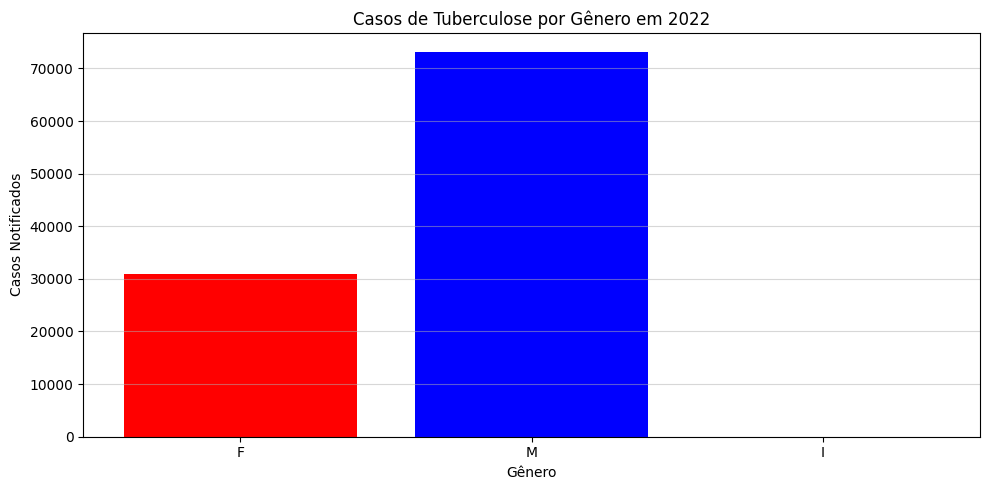

In [97]:
labels = [row['CS_SEXO'] for row in notifica_genero]
sizes = [row['count'] for row in notifica_genero]
colors = ['red', 'blue']
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Casos de Tuberculose por Gênero em 2022')
plt.xlabel('Gênero')
plt.ylabel('Casos Notificados')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

  - Criando gráfico simples para analisar as tendências temporais de notificações:

    - Para que serve isso?
      - A tendência temporal de notificações refere-se à variação ao longo do tempo no número de casos notificados de tuberculose.

      - Essa análise é importante por várias razões:
        - Monitoramento da doença: Permite acompanhar se o número de casos de tuberculose está aumentando, diminuindo ou permanecendo estável ao longo do tempo.

        - Detecção de surtos: Variações bruscas ou tendências crescentes nos casos notificados podem indicar a ocorrência de surtos de tuberculose em determinadas áreas geográficas ou populações.

        - Planejamento de recursos: Compreender a tendência temporal da tuberculose ajuda na alocação eficiente de recursos de saúde, como pessoal médico, medicamentos e infraestrutura, para lidar com o aumento esperado ou diminuição do número de casos.

In [67]:
df_tube = df_tube.withColumn('Data', F.substring(df_tube['DT_NOTIFIC'], 5, 2))
notifica_Data = df_tube.groupBy('Data').count().orderBy('Data')

In [68]:
notifica_Data_df = notifica_Data.toPandas()

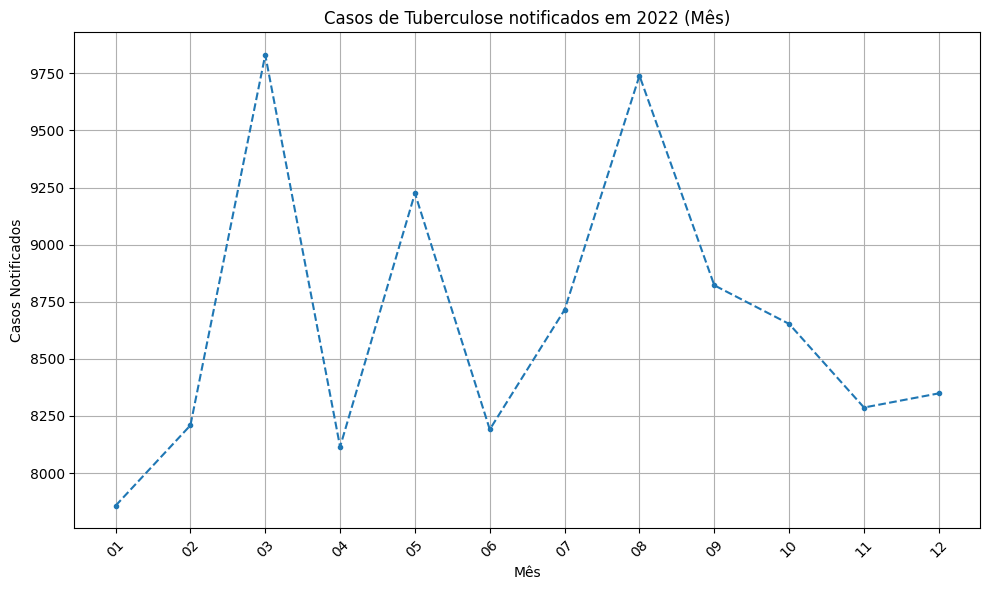

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(notifica_Data_df['Data'], notifica_Data_df['count'], marker='.', linestyle='--')
plt.title('Casos de Tuberculose notificados em 2022 (Mês)')
plt.xlabel('Mês')
plt.ylabel('Casos Notificados')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Gráfico para mostrar os casos de tuberculose no Brasil, por Estado:
  - Dicionário de UF:
    - RO - 11
    - AC - 12
    - AM - 13
    - RR - 14
    - PA - 15
    - AP - 16
    - TO - 17
    - MA - 21
    - PI - 22
    - CE - 23
    - RN - 24
    - PB - 25
    - PE - 26
    - AL - 27
    - SE - 28
    - BA - 29
    - MG - 31
    - ES - 32
    - RJ - 33
    - SP - 35
    - PR - 41
    - SC - 42
    - RS - 43
    - MS - 50
    - MT - 51
    - GO - 52
    - DF - 53

In [70]:
notifica_uf = df_tube.groupBy('SG_UF_NOT').count().orderBy('count', ascending=False).toPandas()

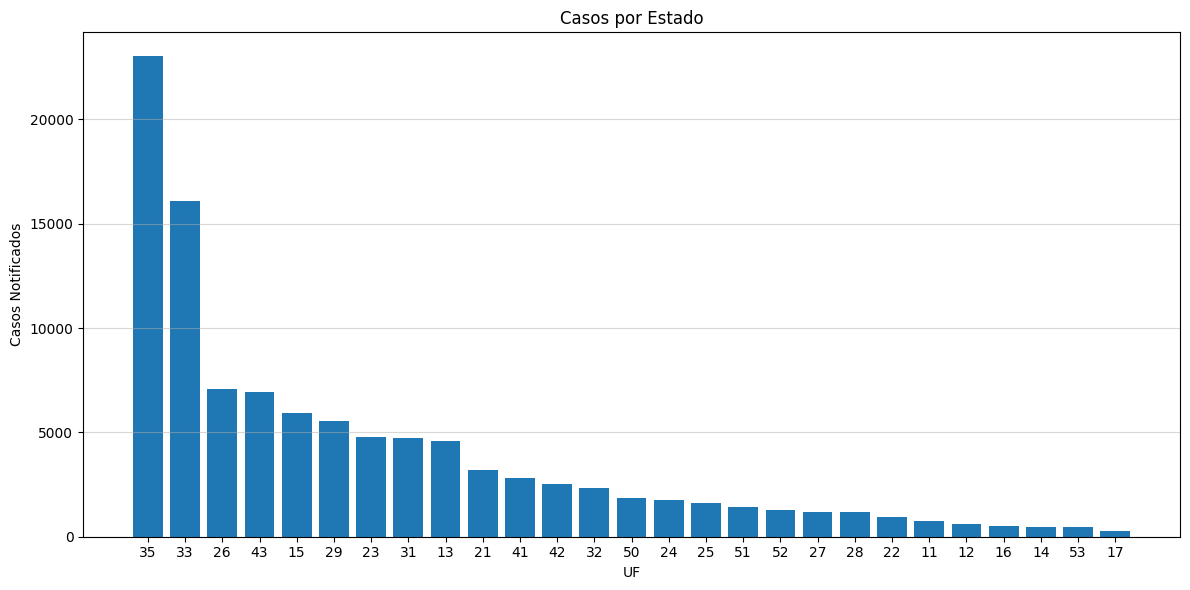

In [107]:
plt.figure(figsize=(12, 6))
plt.bar(notifica_uf['SG_UF_NOT'], notifica_uf['count'])
plt.title('Casos por Estado')
plt.xlabel('UF')
plt.ylabel('Casos Notificados')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

- Gráfico para distribuição de notificações de tuberculose por faixa etária em 2022:

In [72]:
notifica_Idade = df_tube.groupBy('NU_IDADE_N').count().orderBy('NU_IDADE_N').toPandas()

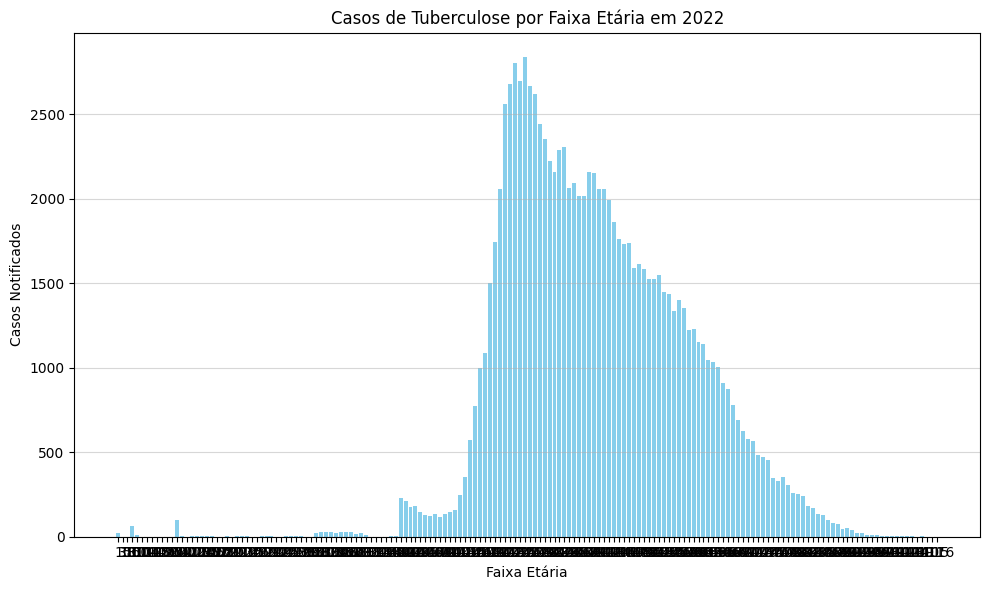

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(notifica_Idade['NU_IDADE_N'], notifica_Idade['count'], color='skyblue')
plt.title('Casos de Tuberculose por Faixa Etária em 2022')
plt.xlabel('Faixa Etária')
plt.ylabel('Casos Notificados')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()